In [21]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# Read the data
# Read dataset file

DATA_DIRECTORY = "data"
INPUT_FILE = "OSA_DB_UPM.xlsx"

df_OSA = pd.read_excel(os.path.join(DATA_DIRECTORY, INPUT_FILE))

df_OSA.head()

,Patient,Gender,Smoker,AHI,BMI,Age,Cervical
0,P0002,hombre,si,29.6,39.305060,56,48.0
1,P0004,hombre,no,19.7,27.636054,39,42.0
2,P0005,hombre,no,9.0,26.729927,32,40.0
3,P0006,hombre,no,2.0,30.193906,32,42.0
4,P0007,hombre,no,34.0,30.110991,39,42.0


In [3]:
df_OSA = df_OSA.drop(['Patient', 'Gender', 'Smoker'], axis=1)

In [4]:
df_OSA.head()

,AHI,BMI,Age,Cervical
0,29.6,39.305060,56,48.0
1,19.7,27.636054,39,42.0
2,9.0,26.729927,32,40.0
3,2.0,30.193906,32,42.0
4,34.0,30.110991,39,42.0


In [5]:
df_OSA['OSA'] = [int(x) for x in (df_OSA['AHI'] > 30)] # 1 means severe
df_OSA = df_OSA.drop(['AHI'], axis=1)
df_OSA.head()

,BMI,Age,Cervical,OSA
0,39.305060,56,48.0,0
1,27.636054,39,42.0,0
2,26.729927,32,40.0,0
3,30.193906,32,42.0,0
4,30.110991,39,42.0,1


In [6]:
# Retrieve principal components

# Copy dataframe
df_OSA_PCA = df_OSA.copy()

# Drop response
df_OSA_PCA = df_OSA_PCA.drop(['OSA'], axis=1)

# Instantiate PCA with the number of components you want
pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(df_OSA_PCA)

# Transform the data to its principal components
components = pca.transform(df_OSA_PCA)

# Build dataframe of principal components
columns = [f'PC{i+1}' for i in range(2)]
df_PC = pd.DataFrame(data=components, columns=columns)

df_OSA = pd.concat([df_OSA, df_PC], axis=1)

df_OSA = df_OSA.drop(['BMI','Cervical','Age'], axis=1)

df_OSA.head()

,OSA,PC1,PC2
0,0,6.989714,11.588199
1,0,-10.464270,-0.910583
2,0,-17.542628,-2.406676
3,0,-17.397202,1.589114
4,1,-10.404591,1.264648


In [7]:
X = df_OSA.drop(['OSA'],axis=1)
y = df_OSA.drop(['PC1','PC2'],axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
y_train.values.ravel()

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [9]:
# Function to performn GridSearch
def grid_searchCV(X_train, y_train, X_test, y_test, estimator, param_grid):
    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=estimator,
                               param_grid=param_grid,
                               scoring='recall',
                               cv=5,
                               verbose=3)

    # Fit the model with grid search
    grid_search.fit(X_train, y_train.values.ravel())

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the performance
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy:", accuracy)

    # Display additional metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return best_model

In [10]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

# Define the parameter grid for grid search
param_grid_log = {
    'penalty': ['l1', 'l2'],           # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'solver': ['liblinear', 'saga']    # Algorithm to use in the optimization problem
}

log_reg_best = grid_searchCV(X_train,y_train,X_test,y_test,logistic_regression,param_grid_log)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.000 total time=   0.0s
[CV 2/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.000 total time=   0.0s
[CV 3/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.000 total time=   0.0s
[CV 4/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.000 total time=   0.0s
[CV 5/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.000 total time=   0.0s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.625 total time=   0.0s
[CV 2/5] END C=0.001, penalty

In [11]:
# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.744

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        94
           1       0.44      0.13      0.20        31

    accuracy                           0.74       125
   macro avg       0.61      0.54      0.52       125
weighted avg       0.69      0.74      0.69       125



In [12]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier_best = grid_searchCV(X_train,y_train,X_test,y_test,dt_classifier,param_grid_dt)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.292 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.417 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.522 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.250 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.292 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.250 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.417 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.478 total time=  

In [13]:
# Create an SVM classifier
svm_classifier = SVC()

# Define the parameter grid for grid search
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [1, 2],
    'gamma': ['scale', 'auto']
}

svc_best = grid_searchCV(X_train,y_train,X_test,y_test,svm_classifier,param_grid_svm)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.1, degree=1, gamma=scale, kernel=linear;, score=0.000 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=scale, kernel=linear;, score=0.000 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=scale, kernel=linear;, score=0.000 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=scale, kernel=linear;, score=0.000 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=scale, kernel=linear;, score=0.000 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=scale, kernel=pol

In [15]:
knn_classifier = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 10, 20, 30, 50, 100],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

knn_best = grid_searchCV(X_train,y_train,X_test,y_test,knn_classifier,param_grid_knn)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END n_neighbors=3, p=1, weights=uniform;, score=0.292 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=1, weights=uniform;, score=0.333 total time=   0.0s
[CV 3/5] END n_neighbors=3, p=1, weights=uniform;, score=0.261 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=1, weights=uniform;, score=0.375 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=1, weights=uniform;, score=0.167 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=1, weights=distance;, score=0.292 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=1, weights=distance;, score=0.375 total time=   0.0s
[CV 3/5] END n_neighbors=3, p=1, weights=distance;, score=0.348 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=1, weights=distance;, score=0.375 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=1, weights=distance;, score=0.208 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=2, weights=uniform;, score=0.292 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=2

In [16]:
rf_classifier = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_best = grid_searchCV(X_train,y_train,X_test,y_test,rf_classifier,param_grid_rf)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=

C:\Users\pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

In [17]:
def confusion_matrix_plot(model, title):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test,y_pred)

    # Create a heatmap of the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

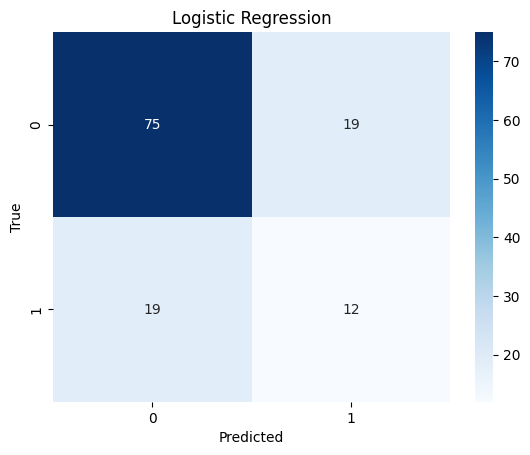

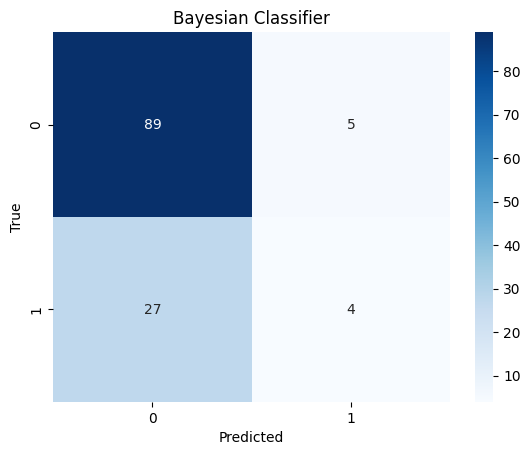

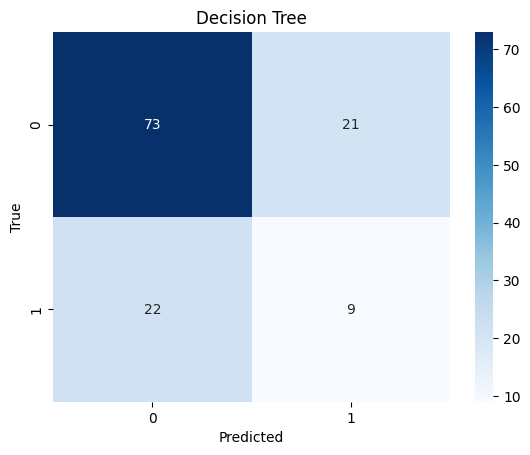

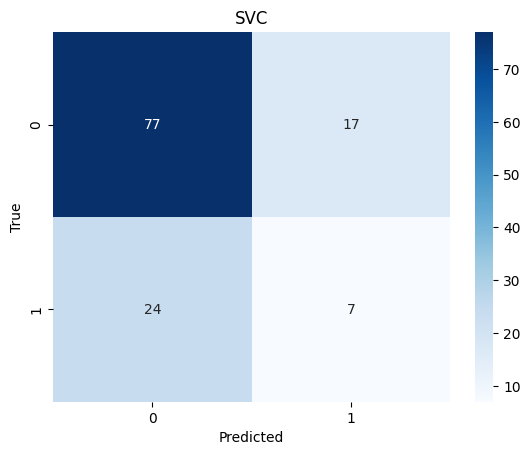

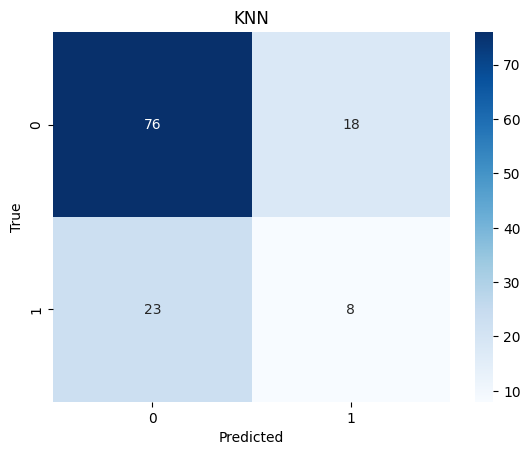

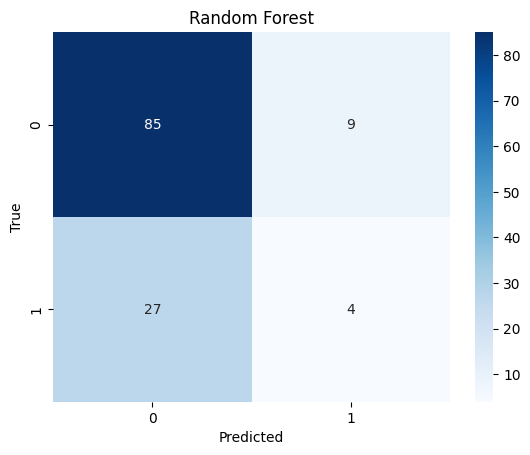

In [25]:
confusion_matrix_plot(log_reg_best, "Logistic Regression")
confusion_matrix_plot(naive_bayes_classifier, "Bayesian Classifier")
confusion_matrix_plot(dt_classifier_best, "Decision Tree")
confusion_matrix_plot(svc_best, "SVC")
confusion_matrix_plot(knn_best, "KNN")
confusion_matrix_plot(rf_best,"Random Forest")

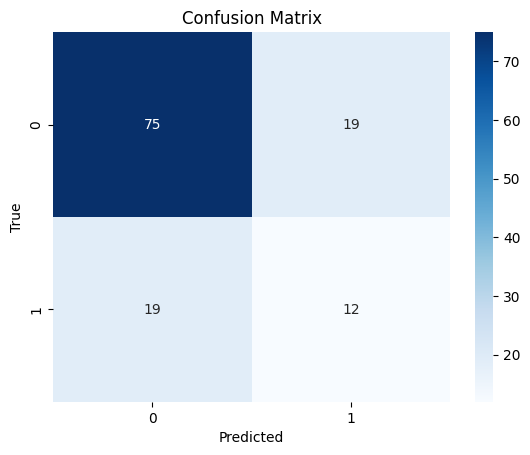

In [108]:
def confusion_matrix_plot(model):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test,y_pred)

    # Create a heatmap of the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()